In [1]:
# Install required libraries
!pip install spacy

In [2]:
!pip install wordcloud

In [3]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
!pip install scikit-learn --upgrade

In [5]:
# Download NLTK resources
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [6]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [7]:
# Import text processing libraries
import re
import spacy
import wordcloud
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize

## 1. Data Exploration and Preprocessing

In [8]:
# Upload the dataset
from google.colab import files
uploaded=files.upload()

Saving blogs (1).csv to blogs (1) (3).csv


In [9]:
# Load the dataset using pandas
df=pd.read_csv('blogs (1).csv')
df.head() # Display the first few rows of the dataframe

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [10]:
df.tail() # Display the last few rows of the dataframe

,Data,Labels
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1999,Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...,talk.religion.misc


In [11]:
df.size # Displays size of the dataframe

4000

In [12]:
df.shape # Displays the shape of the dataframe

(2000, 2)

In [13]:
df.info() # Displays the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [14]:
df.describe() # Reyurns the statistical values of the dataframe

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [15]:
df.isnull().sum() # Missing values

,0
Data,0
Labels,0


In [16]:
df.duplicated().sum() # Duplicates

0

In [17]:
df['Labels'].value_counts() # Values count in the 'Labels' column

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


In [18]:
# Feature Engineering
# Calculate text length
df['len']=df['Data'].apply(len)
df.head() # Display the DataFrame with the new 'len' column

,Data,Labels,len
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264


In [19]:
df['len'].describe() # Statistical values of 'len' column

,len
count,2000.000000
mean,2324.978000
std,3590.560226
min,425.000000
25%,1147.000000
50%,1605.500000
75%,2374.500000
max,62290.000000


In [20]:
# Applying stemmer and stopwords
stemmer=PorterStemmer()
stop_words=set(stopwords.words('english'))

In [21]:
# Text preprocessing
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    # Join tokens back to a single string
    return ' '.join(tokens)

In [22]:
df['clean_data']=df['Data'].apply(preprocess_text)
df[['Data','clean_data']].head() # Display the dataframe with original and processed data

,Data,clean_data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroup altath path cantaloupesrvcscmueducra...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altath talkreligion...


In [23]:
# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [24]:
vectorizer.fit(df['clean_data']) # Fit to the 'preprocessed_text' column

TfidfVectorizer()

In [25]:
# Preparing the data for modeling
# Transform the text data into numerical features
X=vectorizer.transform(df['clean_data'])

In [26]:
y=df['Labels'] # Assign the 'Labels' as target

## 2. Naive Bayes Model for Text Classification

In [27]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [28]:
# Model training using Multinomial Naive Bayes
model=MultinomialNB()

In [29]:
# Train the model on the training data
model.fit(x_train,y_train)

MultinomialNB()

In [30]:
# Make predictions on the testing data
y_pred=model.predict(x_test)

## 3. Sentiment Analysis


In [32]:
# Sentiment analysis using TextBlob
!pip install textblob
from textblob import TextBlob

In [33]:
# Determines the sentiment of a given text using TextBlob.
# Returns 'Positive', 'Negative', or 'Neutral'.
def sentiment(text):
    polarity = TextBlob(text).sentiment.polarity # Get the polarity score
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [34]:
# Apply sentiment analysis for the original data
df['sentiment'] = df['Data'].astype(str).apply(sentiment)

In [35]:
df.head() # Display the dataframe with new 'sentiment' column

,Data,Labels,len,clean_data,sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336,newsgroup altath path cantaloupesrvcscmueducra...,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116,path cantaloupesrvcscmuedudasnewsharvardedunoc...,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264,xref cantaloupesrvcscmuedu altath talkreligion...,Positive


In [36]:
# Analyze sentiment distribution by model
sentiment_distribution = df.groupby(['Labels', 'sentiment'])['sentiment'].count().unstack()
print(sentiment_distribution) # Print the sentiment distribution tabel

sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


In [37]:
# Apply sentiment analysis to the preprocessed text data
df['sentiment_preprocessed']=df['clean_data'].apply(sentiment)

In [38]:
df.head() # Display the dataframe with the new 'sentiment_preprocessed' column

,Data,Labels,len,clean_data,sentiment,sentiment_preprocessed
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Positive,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336,newsgroup altath path cantaloupesrvcscmueducra...,Negative,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116,path cantaloupesrvcscmuedudasnewsharvardedunoc...,Positive,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910,path cantaloupesrvcscmuedumagnesiumclubcccmued...,Positive,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264,xref cantaloupesrvcscmuedu altath talkreligion...,Positive,Positive


In [39]:
# Analyze sentiment distribution of preprocessed text data by label
sentiment_distribution_preprocessed = df.groupby(['Labels','sentiment_preprocessed'])['sentiment_preprocessed'].count().unstack()
print(sentiment_distribution_preprocessed) # Print the sentiment distribution tabel for preprocessed text

sentiment_preprocessed    Negative  Neutral  Positive
Labels                                               
alt.atheism                   49.0      NaN      51.0
comp.graphics                 53.0      NaN      47.0
comp.os.ms-windows.misc       37.0      1.0      62.0
comp.sys.ibm.pc.hardware      29.0      NaN      71.0
comp.sys.mac.hardware         37.0      1.0      62.0
comp.windows.x                44.0      1.0      55.0
misc.forsale                  38.0      NaN      62.0
rec.autos                     28.0      NaN      72.0
rec.motorcycles               37.0      NaN      63.0
rec.sport.baseball            46.0      NaN      54.0
rec.sport.hockey              47.0      NaN      53.0
sci.crypt                     39.0      NaN      61.0
sci.electronics               32.0      NaN      68.0
sci.med                       48.0      1.0      51.0
sci.space                     43.0      NaN      57.0
soc.religion.christian        41.0      NaN      59.0
talk.politics.guns          

<Figure size 1200x600 with 0 Axes>

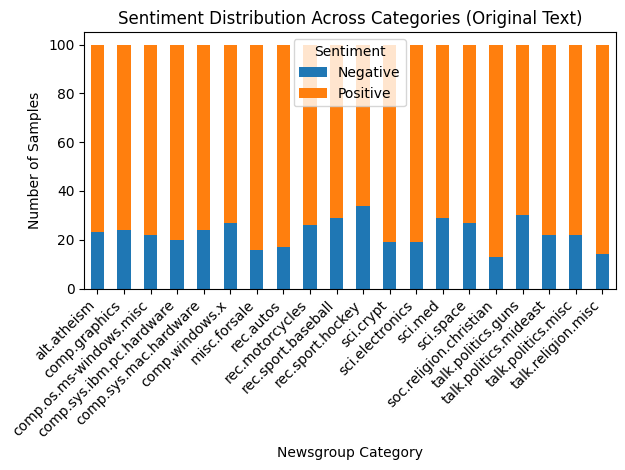

In [40]:
# Visualization for sentiment_distribution (original text data)
plt.figure(figsize=(12, 6))
sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Categories (Original Text)')
plt.xlabel('Newsgroup Category')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

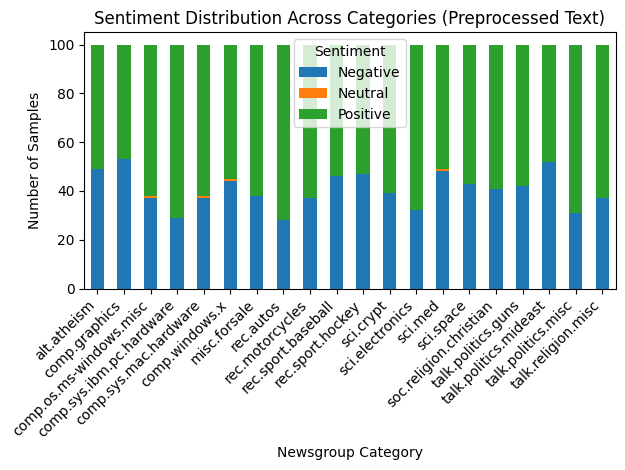

In [41]:
# Visualization for sentiment_distribution_preprocessed (preprocessed text data)
plt.figure(figsize=(12, 6))
sentiment_distribution_preprocessed.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Categories (Preprocessed Text)')
plt.xlabel('Newsgroup Category')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


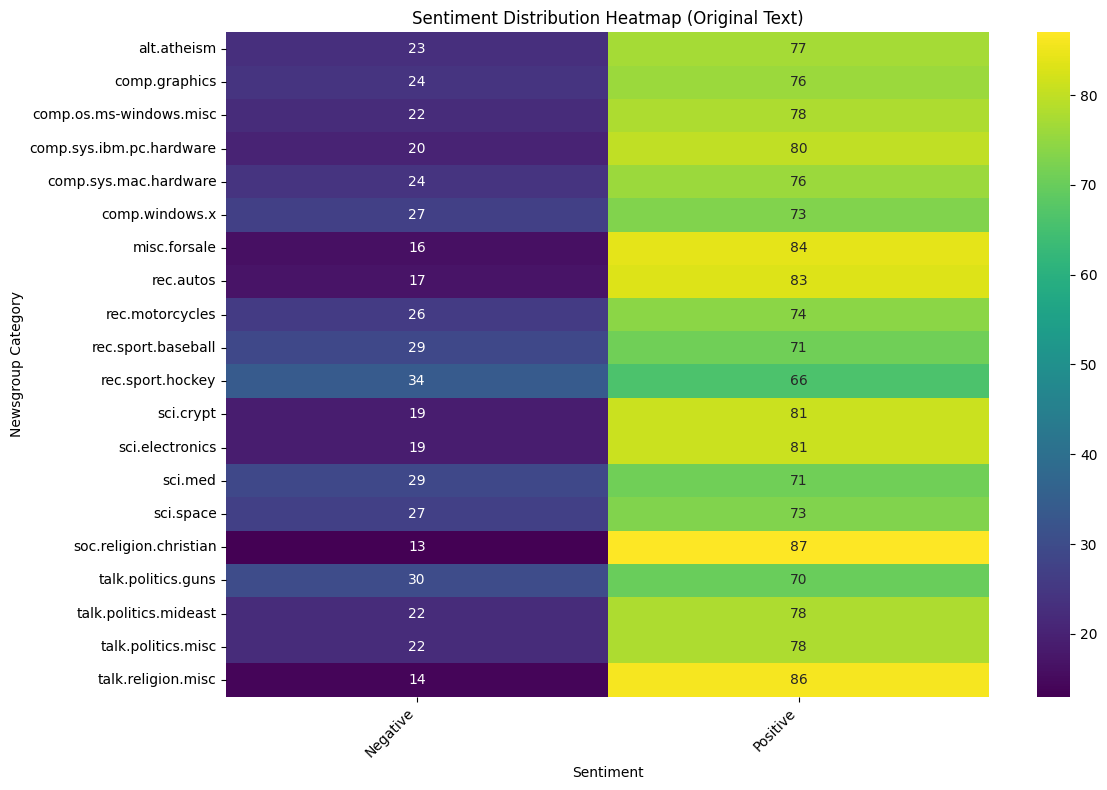

In [42]:
# Heatmap visualization for sentiment_distribution (original text data)
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_distribution, annot=True, cmap='viridis', fmt='d')
plt.title('Sentiment Distribution Heatmap (Original Text)')
plt.xlabel('Sentiment')
plt.ylabel('Newsgroup Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

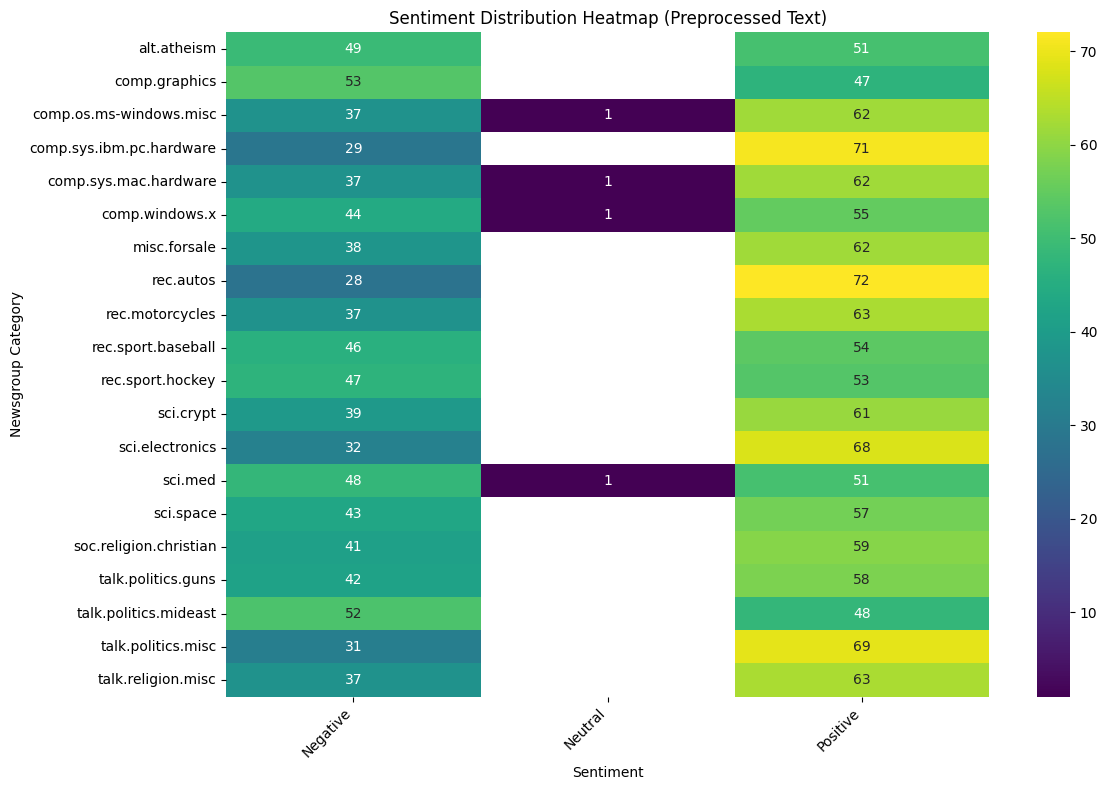

In [45]:
# Heatmap visualization for sentiment_distribution_preprocessed (preprocessed text data)
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_distribution_preprocessed, annot=True, cmap='viridis')
plt.title('Sentiment Distribution Heatmap (Preprocessed Text)')
plt.xlabel('Sentiment')
plt.ylabel('Newsgroup Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Evaluation

In [31]:
# Model Evaluation
accuracy=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)
print('Accuracy:',accuracy)
print('Classification Report:\n',classification_rep)

Accuracy: 0.835
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.76      0.89      0.82        18
 comp.os.ms-windows.misc       0.87      0.91      0.89        22
comp.sys.ibm.pc.hardware       0.85      0.68      0.76        25
   comp.sys.mac.hardware       0.76      0.90      0.83        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       1.00      0.61      0.76        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.86      1.00      0.92        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.76      1.00      0.86        19
         sci.electronics       0.72      0.81      0.76        16
                 sci.med       0.94

**Discussion of Model Performance**

The model achieves an accuracy of 83.5%, which indicates a reasonably strong performance for this multi-class classification task. However, there are variations in precision, recall, and F1-scores across the classes.

**Performance Highlights**

High Precision in Certain Classes:

* Classes like comp.windows.x, misc.forsale, talk.politics.mideast, and sci.space have a precision of 1.0, indicating the model rarely misclassifies examples from these categories.
* This suggests these categories have distinctive features that the model effectively captures.

Strong Recall for Most Classes:

* Several classes, such as sci.crypt, rec.sport.baseball, rec.sport.hockey, and talk.politics.mideast, achieve a recall of 1.0.
* This shows the model is effectively identifying almost all true positives for these categories.

Balanced Macro Average:

* The macro average precision, recall, and F1-score are close to each other, demonstrating a balanced performance across most classes without significant bias towards any one category.


**Challenges Encountered**

Low Performance in Some Classes:

* For talk.religion.misc, the recall (0.25) and F1-score (0.38) are very low.
*Likely due to limited or overlapping features with other categories, leading to confusion during classification.
*Possible solutions: Increase training samples for this category or improve feature representation.

Imbalanced Precision and Recall:

* Some classes, such as misc.forsale (precision 1.00, recall 0.61), have a high precision but lower recall, indicating the model is conservative in assigning these labels, potentially leaving out true positives.

Overfitting in Some Categories:

* Categories like comp.windows.x and misc.forsale might be overfitting due to distinctive or overly specific features that generalize poorly to unseen data.

High Variance in Support:

* Classes like talk.religion.misc (24 samples) and rec.sport.hockey (15 samples) have varying numbers of samples, which could lead to biased performance. A more balanced dataset would improve generalizability.


**Raw Data Sentiment Distribution**

* **Positive Sentiments** dominate most categories, typically ranging from 70% to 90%.

* Notable categories with the highest proportion of positive sentiment:
* soc.religion.christian (87%)
* misc.forsale (84%)
* rec.autos (83%)
* Implication: These topics may have a positive or neutral tone, focusing on uplifting discussions, sales, or practical exchanges of information.

* **Negative Sentiments** are more prevalent in:

* rec.sport.hockey (34%)
* talk.politics.guns (30%)
* rec.sport.baseball (29%)
* Implication: Topics related to sports and politics might involve contentious or emotional discussions, leading to higher negative sentiment.

**Preprocessed Data Sentiment Distribution**

* After preprocessing, sentiment distribution shifts:
* More **negative sentiment** is detected across categories.
* E.g., alt.atheism (49%), comp.graphics (53%), and rec.sport.hockey (47%) see an increase in negative sentiment.
* Implication: Preprocessing might remove positive sentiment cues (e.g., emojis, punctuation) or exaggerate negative sentiment due to word truncation from stemming.
* **Neutral Sentiments:** Appear infrequently and are mostly noise (e.g., single instances in a few categories).
* Suggestion: Neutral classification might not be robust due to preprocessing.
